In [256]:
#To predict the closing stock price for past 60 days for appl.inc 

In [257]:
#importing libraries 

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers  import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
df = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2021-03-29')
#df.head()
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-22,236.899994,230.139999,230.270004,235.990005,30127000.0,235.990005
2021-03-23,241.050003,237.070007,237.490005,237.580002,31638400.0,237.580002
2021-03-24,238.000000,235.320007,237.850006,235.460007,25620100.0,235.460007
2021-03-25,236.940002,231.570007,235.300003,232.339996,34061900.0,232.339996
2021-03-26,236.710007,231.550003,231.550003,236.479996,25471700.0,236.479996


In [30]:
df.shape

(2323, 6)

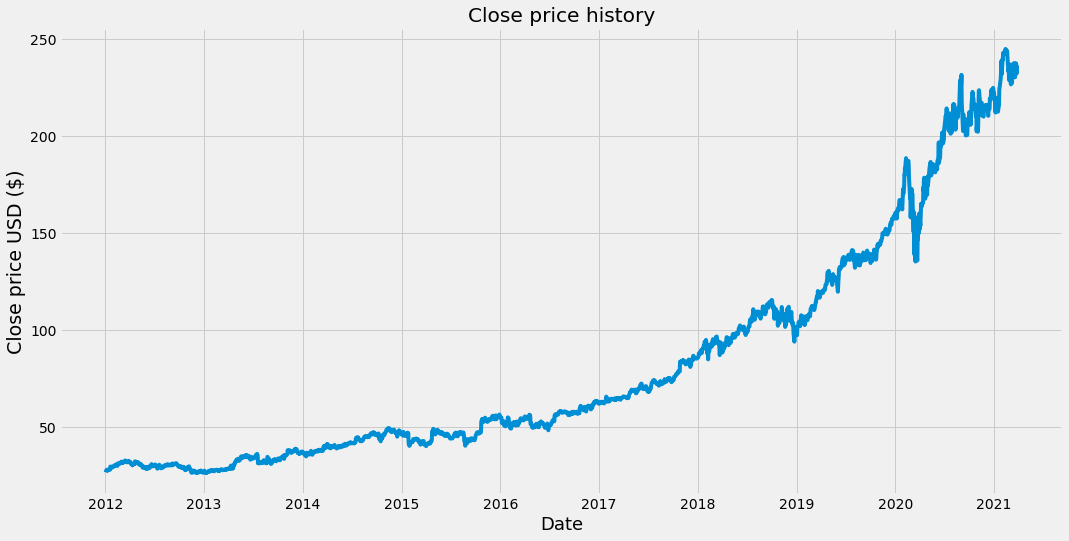

In [31]:
#To visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=19)
plt.show()

In [32]:
#creating a new dataframe with the close column only 
data = df.filter(['Close'])
#Converting the dataframe to numpy array
dataset = data.values
#Geting the number of 80 percent of data as traning len 
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len


1859

In [33]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00182966],
       [0.00471137],
       [0.00599213],
       ...,
       [0.95640839],
       [0.942137  ],
       [0.96107397]])

In [8]:
#Creation of training dataset 
training_data = scaled_data[0:training_data_len]

#Spliting the dataset into x_train & y_train datasets
'''
Create a training data set that contains the past 60 day closing price values that we want to use to predict the 61st closing price value.

So the first column in the ‘x_train’ data set will contain values from the data set from index 0 to index 59 (60 values total) and the second column will contain values from the data set from index 1 to index 60 (60 values) and so on and so forth.

The ‘y_train’ data set will contain the 61st value located at index 60 for it’s first column and the 62nd value located at index 61 of the data set for it’s second value and so on and so forth.

'''
x_train = []
y_train = []

for i in range(60, len(training_data)):
  x_train.append(training_data[i-60:i, 0])
  y_train.append(training_data[i, 0]) 

  if i<= 61:
    print(x_train) 
    print()
    print(y_train)
    

[array([0.0058757 , 0.00837602, 0.01312663, 0.01987749, 0.02044003,
       0.020065  , 0.01756468, 0.0191899 , 0.02869106, 0.02087759,
       0.03206649, 0.03181645, 0.03119138, 0.04125515, 0.04306788,
       0.0425678 , 0.04575572, 0.05656954, 0.05569444, 0.04831851,
       0.06250781, 0.05781973, 0.04231777, 0.01868982, 0.03950494,
       0.02875358, 0.        , 0.01981497, 0.02575319, 0.03012876,
       0.0362545 , 0.04781849, 0.04369295, 0.04819352, 0.04050504,
       0.04200526, 0.05656954, 0.06507061, 0.05744465, 0.05475681,
       0.0490061 , 0.05025629, 0.05394422, 0.05194398, 0.0553194 ,
       0.05888235, 0.0720715 , 0.07350915, 0.05875735, 0.05525688,
       0.05731965, 0.05994497, 0.04925614, 0.05075631, 0.04669334,
       0.02987873, 0.01356418, 0.05481933, 0.02787848, 0.0273784 ])]
[0.03912985607875741]

[array([0.0058757 , 0.00837602, 0.01312663, 0.01987749, 0.02044003,
       0.020065  , 0.01756468, 0.0191899 , 0.02869106, 0.02087759,
       0.03206649, 0.03181645, 0.03

In [9]:
#reshaping the data
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(588, 60, 1)

In [10]:
#Building the LSTM model 
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#FOR Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

588/588 [==============================] - 16s 27ms/step - loss: 0.0023


In [13]:
#Creating the testing dataset
#Create a new array containing scaled values from index 1348 to 2005
test_data = scaled_data[training_data_len - 60: , :]

#Creating the data x_test and y_test 
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)): 
 x_test.append(test_data[i-60:i, 0])



In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [16]:
 x_test.shape

(161, 60, 1)

In [17]:
#Predict the price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [18]:
#Root mean square error
rmse = np.sqrt( np.mean(predictions - y_test )**2 )
rmse

2.180057501940994

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


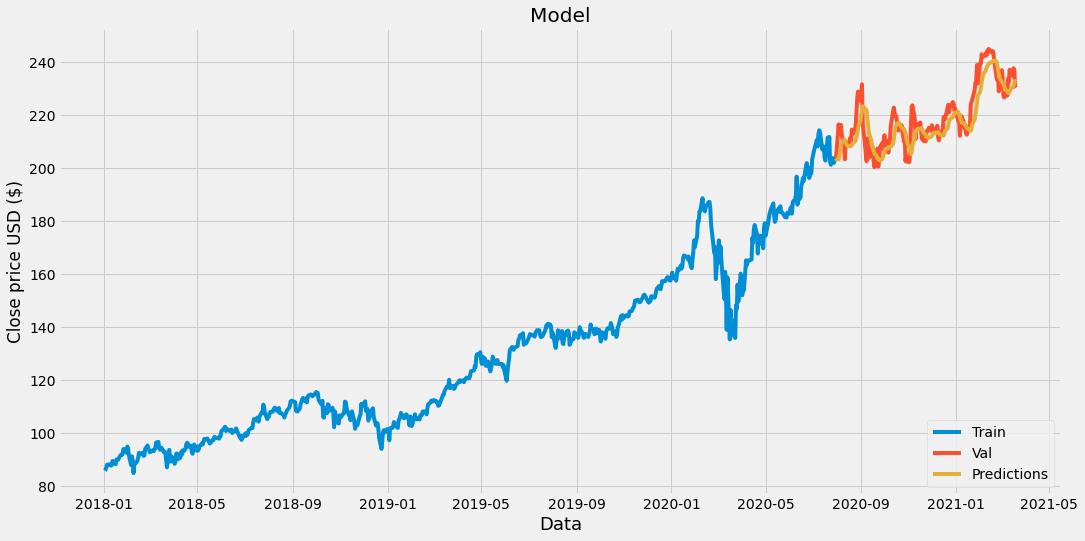

In [19]:
#PLOT THE DATA 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 
#visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [20]:
 valid

,Close,Predictions
Date,,
2020-07-30,203.899994,203.650955
2020-07-31,205.009995,203.360489
2020-08-03,216.539993,203.352264
2020-08-04,213.289993,204.939117
2020-08-05,212.940002,206.618332
...,...,...
2021-03-15,234.809998,230.667084
2021-03-16,237.710007,231.357285
2021-03-17,237.039993,232.217529


In [21]:
 #Get the data qoute 
 apple_qoute = web.DataReader('AAPL',data_source='yahoo', start ='2018-01-01', end='2021-03-31')
 #creating new dataframe
 new_df = apple_qoute.filter(['Close'])
 #get the last 60 days value and then convert into numpy array
 last_60_days = new_df[-60:].values
 #scale the  data between 0 and 1
 last_60_days_scaled = scaler.transform(last_60_days)
 #create and empty list 
 X_test = []
#APPEND THE past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy array
X_test = np.array(X_test)
#Reshape the data 

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Geting the predicted price 
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[122.33391]]


In [22]:
apple_qoute2 = web.DataReader('AAPL',data_source='yahoo', start ='2018-01-01', end='2021-03-31')
print(apple_qoute2['Close'])

Date
2018-01-02     43.064999
2018-01-03     43.057499
2018-01-04     43.257500
2018-01-05     43.750000
2018-01-08     43.587502
                 ...    
2021-03-22    123.389999
2021-03-23    122.540001
2021-03-24    120.089996
2021-03-25    120.589996
2021-03-26    121.209999
Name: Close, Length: 814, dtype: float64
